En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

In [4]:
digits.data = digits.data[(digits.target==1) | (digits.target==9)]
digits.target = digits.target[(digits.target==1) | (digits.target==9)] 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    test_size=0.25,
                                                    random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'solver':['saga'],
    'penalty':['elasticnet', 'l1', 'l2', 'None'],
    'C': [0.1, 0.2, 0.3, 0.5, 0.8, 1, 1.2, 1.5],
    'l1_ratio': np.arange(0, 1, 0.1),
    'max_iter': [100,1000,10000]
}

model = LogisticRegression()

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1
                          )

grid_search.fit(X_train, y_train)

C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_logistic.py",

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.5, 0.8, 1, 1.2, 1.5],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['elasticnet', 'l1', 'l2', 'None'],
                         'solver': ['saga']},
             scoring='f1')

In [13]:
grid_search.best_params_

{'C': 0.1,
 'l1_ratio': 0.0,
 'max_iter': 1000,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [14]:
grid_search.best_score_

0.9928548644338118

In [16]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        47

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [20]:
y_test2 = np.where(y_test==9,0,1)
y_test2

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0])

In [25]:
predictions

array([[4.92144103e-06, 9.99995079e-01],
       [9.99633034e-01, 3.66965957e-04],
       [9.99930718e-01, 6.92824796e-05],
       [9.85965623e-01, 1.40343774e-02],
       [9.99891201e-01, 1.08799213e-04],
       [1.46929079e-05, 9.99985307e-01],
       [4.64338433e-03, 9.95356616e-01],
       [1.03299165e-02, 9.89670084e-01],
       [9.99977209e-01, 2.27905737e-05],
       [6.72020525e-02, 9.32797947e-01],
       [9.98767923e-01, 1.23207746e-03],
       [9.99571337e-01, 4.28663338e-04],
       [9.74143202e-01, 2.58567983e-02],
       [9.99950259e-01, 4.97412978e-05],
       [9.99944464e-01, 5.55359241e-05],
       [2.67730774e-01, 7.32269226e-01],
       [8.93753702e-01, 1.06246298e-01],
       [1.97668735e-04, 9.99802331e-01],
       [9.96173012e-01, 3.82698771e-03],
       [6.23880339e-01, 3.76119661e-01],
       [1.29383428e-05, 9.99987062e-01],
       [5.01812200e-03, 9.94981878e-01],
       [8.13014855e-05, 9.99918699e-01],
       [6.40845934e-04, 9.99359154e-01],
       [9.333425

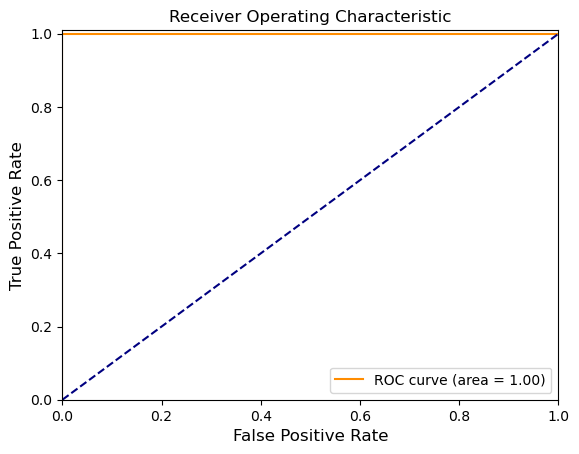

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

predictions = grid_search.best_estimator_.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(y_test2, predictions[:, 0])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()